Importing all needed files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r'C:\Users\hafke\AppData\Local\Temp\60de6a18-8ec9-42d5-9234-091ce63ccdbb_archive.zip.dbb\NFL Play by Play 2009-2018 (v5).csv')
df.head()
df.info()
df.describe()


C:\Users\hafke\AppData\Local\Temp\ipykernel_23092\624119734.py:8: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\hafke\AppData\Local\Temp\60de6a18-8ec9-42d5-9234-091ce63ccdbb_archive.zip.dbb\NFL Play by Play 2009-2018 (v5).csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 255 entries, play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 874.2+ MB


,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,...,0.0,6026.000000,47.000000,449350.000000,32618.000000,449371.000000,436497.000000,436497.000000,436497.0,436497.0
mean,2140.689606,2.013620e+09,49.800658,413.968820,810.775709,1700.697033,0.017111,12.275053,0.072090,2.577696,...,NaN,2.302688,4.808511,1.042773,8.487829,0.001823,0.000069,0.000014,0.0,0.0
std,1240.303671,2.842246e+06,25.062131,279.137304,554.712205,1053.533368,0.129684,7.124626,0.258637,1.129958,...,NaN,9.066064,14.961746,5.462253,5.323953,0.042652,0.008290,0.003708,0.0,0.0
min,35.000000,2.009091e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,-34.000000,-16.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1074.000000,2.011111e+09,31.000000,152.000000,286.000000,784.000000,0.000000,6.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2125.000000,2.013123e+09,52.000000,396.000000,797.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3180.000000,2.016103e+09,71.000000,656.000000,1288.000000,2583.000000,0.000000,18.000000,0.000000,4.000000,...,NaN,0.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
max,5706.000000,2.018122e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,5.000000,...,NaN,93.000000,77.000000,109.000000,66.000000,1.000000,1.000000,1.000000,0.0,0.0


In [2]:
for col in df.columns:
    print(col)


play_id
game_id
home_team
away_team
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa
total_away_rush_epa
total_home_pass_epa
total_away_pass_e

   posteam  yards_gained
22      NO       65229.0
21      NE       62156.0
26     PHI       59465.0
27     PIT       58810.0
1      ATL       58563.0
11      GB       58344.0
8      DAL       57777.0
9      DEN       57254.0
10     DET       56436.0
12     HOU       56171.0
13     IND       55512.0
23     NYG       55309.0
34     WAS       55090.0
29     SEA       54097.0
16      KC       54096.0
2      BAL       54000.0
4      CAR       53988.0
32      TB       53721.0
20     MIN       53278.0
25     OAK       52986.0
6      CIN       52943.0
5      CHI       51987.0
3      BUF       51734.0
30      SF       51680.0
33     TEN       51617.0
24     NYJ       51222.0
19     MIA       51216.0
0      ARI       50971.0
7      CLE       48597.0
28      SD       46565.0
14     JAC       34733.0
31     STL       33792.0
17      LA       16389.0
15     JAX       15790.0
18     LAC       11859.0


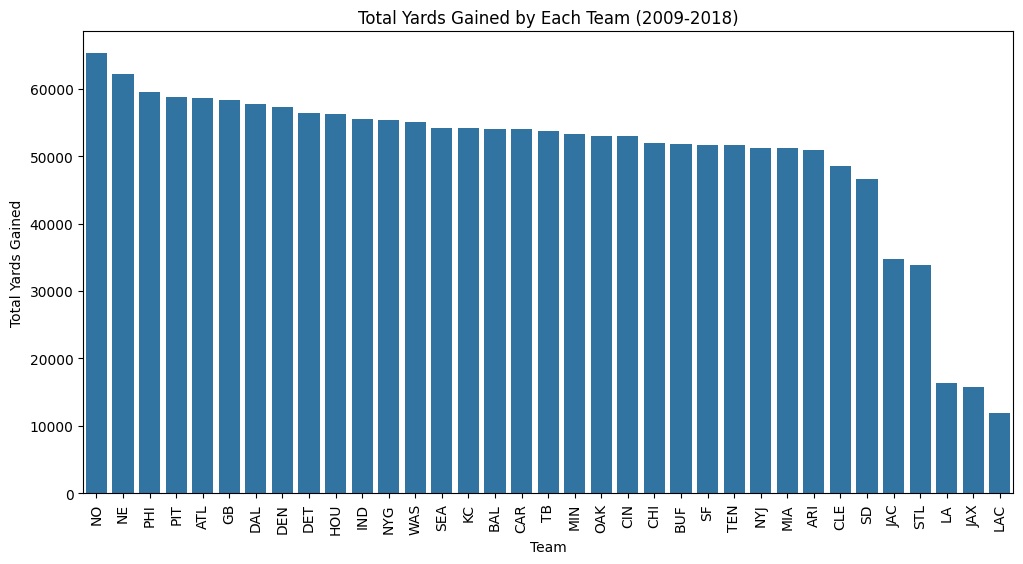

In [3]:
# how much yards each team has gotten in total.
team_yards = df.groupby('posteam')['yards_gained'].sum().reset_index()
team_yards = team_yards.sort_values(by='yards_gained', ascending=False)
plt.figure(figsize=(12, 6))
print(team_yards)
sns.barplot(x='posteam', y='yards_gained', data=team_yards)
plt.xticks(rotation=90)
plt.title('Total Yards Gained by Each Team (2009-2018)')
plt.xlabel('Team')
plt.ylabel('Total Yards Gained')
plt.show()

     year posteam  yards_gained
0    2009     ARI        5323.0
1    2009     ATL        5050.0
2    2009     BAL        5289.0
3    2009     BUF        3979.0
4    2009     CAR        4974.0
..    ...     ...           ...
318  2018     SEA        5307.0
319  2018      SF        5475.0
320  2018      TB        6337.0
321  2018     TEN        4834.0
322  2018     WAS        4704.0

[323 rows x 3 columns]


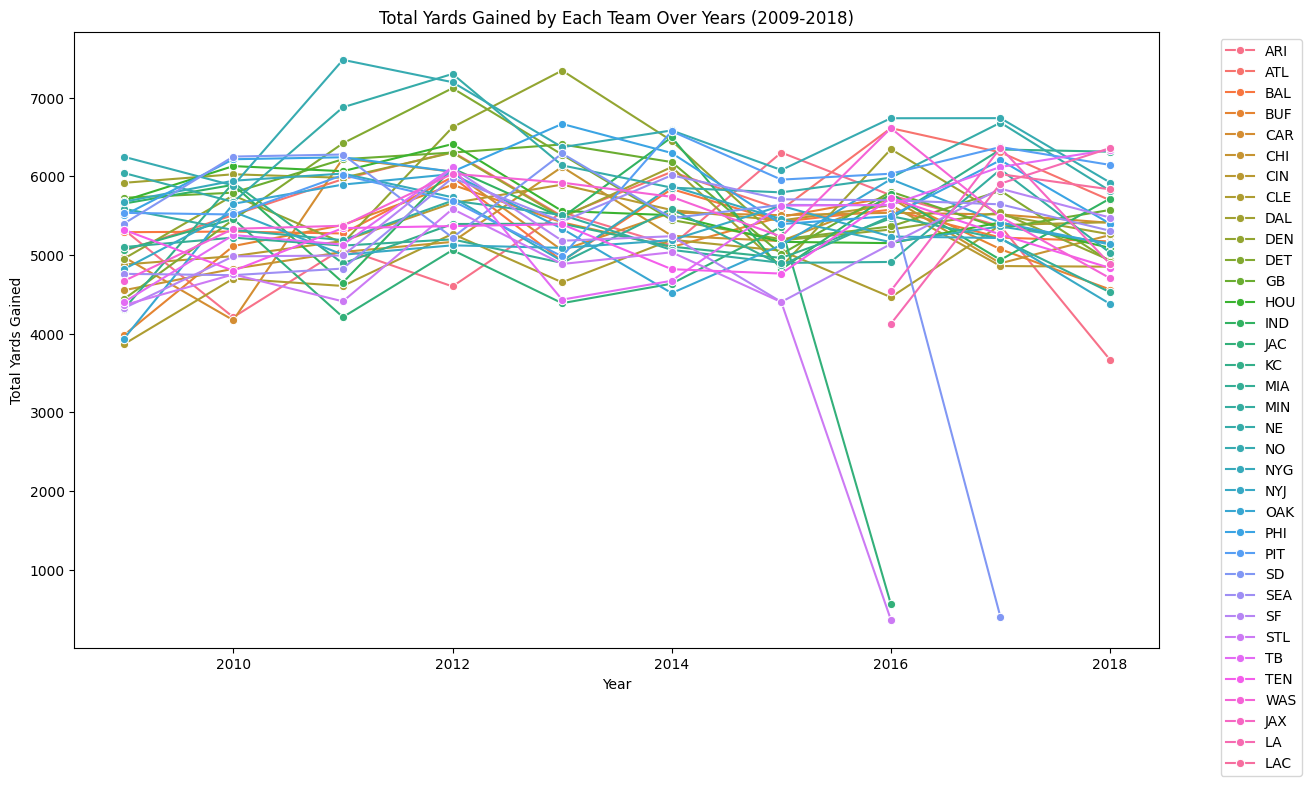

In [4]:
# how much yards each team has made in total for each year
df['year'] = pd.to_datetime(df['game_date']).dt.year
yearly_team_yards = df.groupby(['year', 'posteam'])['yards_gained'].sum().reset_index()
print(yearly_team_yards)
plt.figure(figsize=(14, 8)) 
sns.lineplot(x='year', y='yards_gained', hue='posteam', data=yearly_team_yards, marker='o')
plt.title('Total Yards Gained by Each Team Over Years (2009-2018)')
plt.xlabel('Year')
plt.ylabel('Total Yards Gained')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
# Probability a team wins when it gains more yards than the opponent

# Step 1: Calculate total yards per team per game
yards = df.groupby(['game_id', 'posteam'])['yards_gained'].sum().reset_index()
yards = yards.rename(columns={'yards_gained': 'total_yards'})

# Step 2: Get final points per team (if not already in dataset)
points = df.groupby(['game_id', 'posteam']).agg(total_points=('posteam_score_post', 'max')).reset_index()

# Step 3: Merge yards and points
game_stats = pd.merge(yards, points, on=['game_id', 'posteam'])

# Step 4: Pivot so each game has both teams
teams = df[['game_id', 'home_team', 'away_team']].drop_duplicates()
game_stats = game_stats.merge(teams, left_on='game_id', right_on='game_id', how='left')

# Create home vs away columns
home_stats = game_stats[game_stats['posteam'] == game_stats['home_team']].copy()
away_stats = game_stats[game_stats['posteam'] == game_stats['away_team']].copy()

home_stats = home_stats.rename(columns={
    'total_yards': 'home_yards',
    'total_points': 'home_points',
    'posteam': 'home_team'
})
away_stats = away_stats.rename(columns={
    'total_yards': 'away_yards',
    'total_points': 'away_points',
    'posteam': 'away_team'
})

game_summary = pd.merge(home_stats[['game_id','home_team','home_yards','home_points']],
                        away_stats[['game_id','away_team','away_yards','away_points']],
                        on='game_id')

# Step 5: Calculate if team with more yards won
more_yards = (game_summary['home_yards'] > game_summary['away_yards']) | (game_summary['away_yards'] > game_summary['home_yards'])
won_with_more_yards = ((game_summary['home_yards'] > game_summary['away_yards']) & (game_summary['home_points'] > game_summary['away_points'])) | \
                      ((game_summary['away_yards'] > game_summary['home_yards']) & (game_summary['away_points'] > game_summary['home_points']))

prob_win_given_more_yards = won_with_more_yards.sum() / more_yards.sum()
print(f"Probability a team wins when it gains more yards than the opponent: {prob_win_given_more_yards:.2%}")

Probability a team wins when it gains more yards than the opponent: 66.49%


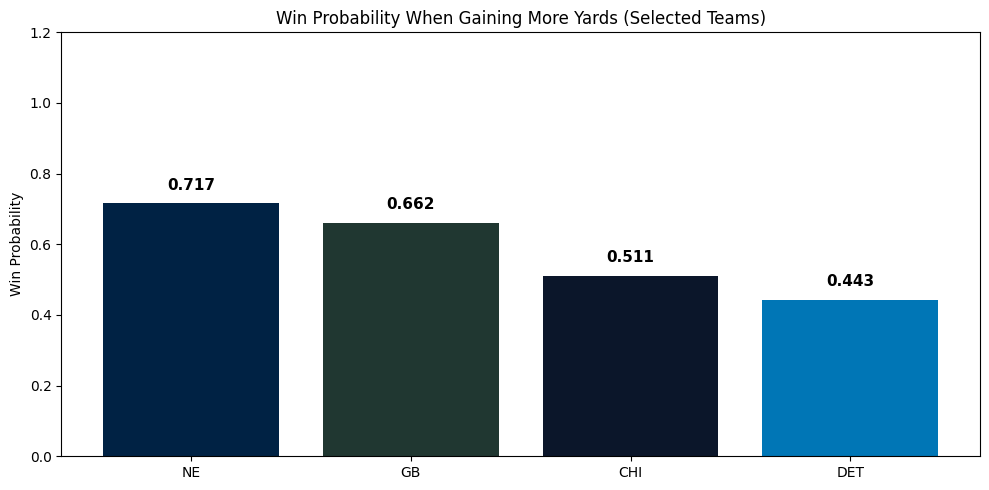

In [6]:
# Probability of each team winning when it gains more yards than the opponent

# Read CSV ignoring dtype warnings
df = pd.read_csv(
    r'C:\Users\hafke\AppData\Local\Temp\60de6a18-8ec9-42d5-9234-091ce63ccdbb_archive.zip.dbb\NFL Play by Play 2009-2018 (v5).csv',
    low_memory=False
)

# Compute total yards per team per game
yards = df.groupby(['game_id', 'posteam'])['yards_gained'].sum().reset_index()

# Get home and away team scores
scores = df[['game_id', 'home_team', 'away_team', 'total_home_score', 'total_away_score']].drop_duplicates()

# Melt scores so each team has its own row
home_scores = scores.rename(columns={'home_team':'team', 'total_home_score':'score', 'away_team':'opp_team', 'total_away_score':'opp_score'})
away_scores = scores.rename(columns={'away_team':'team', 'total_away_score':'score', 'home_team':'opp_team', 'total_home_score':'opp_score'})
scores_long = pd.concat([home_scores, away_scores], ignore_index=True)

# Merge yards with scores
team_stats = pd.merge(yards, scores_long, left_on=['game_id', 'posteam'], right_on=['game_id', 'team'])

# Did the team win?
team_stats['won'] = team_stats['score'] > team_stats['opp_score']

# Probability of winning when having more yards than opponent, by team
result = (
    team_stats[team_stats['yards_gained'] > team_stats['opp_score']]  # <-- careful, we should use opponent yards, not score
)

# First compute opponent yards per game
opp_yards = yards.rename(columns={'posteam':'opp_team', 'yards_gained':'opp_yards'})
team_stats = pd.merge(team_stats, opp_yards, left_on=['game_id','opp_team'], right_on=['game_id','opp_team'])
team_stats['won'] = team_stats['score'] > team_stats['opp_score']

# Probability of winning when having more yards
result = (
    team_stats[team_stats['yards_gained'] > team_stats['opp_yards']]
    .groupby('team')['won']
    .mean()
    .reset_index()
    .rename(columns={'won':'win_prob_if_more_yards'})
)

teams_to_show = ['NE', 'DET', 'CHI', 'GB']
result_small = result[result['team'].isin(teams_to_show)]

team_colors = {
    'NE': '#002244',
    'DET': '#0076B6',
    'CHI': '#0B162A',
    'GB': '#203731',
}

# Sort by win probability descending
result_small = result_small.sort_values('win_prob_if_more_yards', ascending=False)

colors = [team_colors[t] for t in result_small['team']]

plt.figure(figsize=(10,5))
bars = plt.bar(result_small['team'],
               result_small['win_prob_if_more_yards'],
               color=colors)

for bar, prob in zip(bars, result_small['win_prob_if_more_yards']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y + 0.03,
             f"{prob:.3f}",
             ha='center', va='bottom',
             fontsize=11, fontweight='bold')

plt.ylabel("Win Probability")
plt.title("Win Probability When Gaining More Yards (Selected Teams)")
plt.ylim(0, 1.20)
plt.tight_layout()
plt.show()

In [ ]:
# Filter full_stats for games where the opponent had MORE turnovers
winning_turnover = full_stats[full_stats['opp_turnovers'] > full_stats['team_turnovers']]

# Compute win percentage for each team in these situations
result = (
    winning_turnover.groupby('team')['won']
    .mean()
    .reset_index()
    .rename(columns={'won': 'win_pct_when_forcing_more_turnovers'})
)

# Calculate overall average across all teams
overall_avg = result['win_pct_when_forcing_more_turnovers'].mean()
print(f"Average win % for all teams when opponent has more turnovers: {overall_avg*100:.1f}%")


Average win % for all teams when opponent has more turnovers: 62.2%


In [ ]:

import pandas as pd
import numpy as np
%pip install jinja2


# convert game_date to datetime and determine season
df['game_date'] = pd.to_datetime(df['game_date'])
df['season'] = df['game_date'].apply(lambda x: x.year - 1 if x.month < 7 else x.year)

# compute final scores and determine winner per game
game_scores = (
    df.groupby(['game_id', 'season', 'home_team', 'away_team'])
    .agg({'total_home_score': 'max', 'total_away_score': 'max'})
    .reset_index()
)
game_scores['winner'] = game_scores.apply(
    lambda row: row['home_team'] if row['total_home_score'] > row['total_away_score']
    else (row['away_team'] if row['total_away_score'] > row['total_home_score'] else None),
    axis=1
)

# count wins per team-season
wins = (
    game_scores.dropna(subset=['winner'])
    .groupby(['season', 'winner'])
    .size()
    .reset_index(name='wins')
    .rename(columns={'winner': 'team'})
)

# aggregate points scored
home_points = (
    game_scores.groupby(['season', 'home_team'])['total_home_score']
    .sum()
    .reset_index()
    .rename(columns={'home_team': 'team', 'total_home_score': 'points'})
)
away_points = (
    game_scores.groupby(['season', 'away_team'])['total_away_score']
    .sum()
    .reset_index()
    .rename(columns={'away_team': 'team', 'total_away_score': 'points'})
)
points = pd.concat([home_points, away_points]).groupby(['season', 'team'])['points'].sum().reset_index()

# aggregate yards gained
yards = (
    df.groupby(['season', 'posteam'])['yards_gained']
    .sum()
    .reset_index()
    .rename(columns={'posteam': 'team', 'yards_gained': 'yards'})
)

# aggregate yards allowed
yards_allowed = (
    df.groupby(['season', 'defteam'])['yards_gained']
    .sum()
    .reset_index()
    .rename(columns={'defteam': 'team', 'yards_gained': 'yards_allowed'})
)

# calculate turnovers
df['turnover'] = ((df['interception'] == 1) | (df['fumble_lost'] == 1)).astype(int)
turnovers = (
    df.groupby(['season', 'posteam'])['turnover']
    .sum()
    .reset_index()
    .rename(columns={'posteam': 'team', 'turnover': 'turnovers'})
)

# aggregate touchdowns
touchdowns = (
    df.groupby(['season', 'posteam'])['touchdown']
    .sum()
    .reset_index()
    .rename(columns={'posteam': 'team', 'touchdown': 'touchdowns'})
)

# aggregate first downs (pass and rush)
first_down_pass = (
    df.groupby(['season', 'posteam'])['first_down_pass']
    .sum()
    .reset_index()
    .rename(columns={'posteam': 'team'})
)
first_down_rush = (
    df.groupby(['season', 'posteam'])['first_down_rush']
    .sum()
    .reset_index()
    .rename(columns={'posteam': 'team'})
)

# aggregate sacks allowed
sacks = (
    df.groupby(['season', 'defteam'])['sack']
    .sum()
    .reset_index()
    .rename(columns={'defteam': 'team', 'sack': 'sacks'})
)

# merge all stats into one team-season DataFrame
team_stats_full = wins.merge(points, on=['season','team'], how='left')
team_stats_full = team_stats_full.merge(yards, on=['season','team'], how='left')
team_stats_full = team_stats_full.merge(yards_allowed, on=['season','team'], how='left')
team_stats_full = team_stats_full.merge(turnovers, on=['season','team'], how='left')
team_stats_full = team_stats_full.merge(touchdowns, on=['season','team'], how='left')
team_stats_full = team_stats_full.merge(first_down_pass, on=['season','team'], how='left')
team_stats_full = team_stats_full.merge(first_down_rush, on=['season','team'], how='left')
team_stats_full = team_stats_full.merge(sacks, on=['season','team'], how='left')
team_stats_full = team_stats_full.fillna(0)

# Example: additional offensive stats
additional_offense = {
    'completions': df.groupby(['season', 'posteam'])['complete_pass'].sum(),
    'pass_attempts': df.groupby(['season', 'posteam'])['pass_attempt'].sum(),
    'rush_attempts': df.groupby(['season', 'posteam'])['rush_attempt'].sum(),
    'pass_tds': df.groupby(['season', 'posteam'])['pass_touchdown'].sum(),
    'rush_tds': df.groupby(['season', 'posteam'])['rush_touchdown'].sum(),
    'extra_points': df.groupby(['season', 'posteam'])['extra_point_attempt'].sum(),
    'two_point_attempts': df.groupby(['season', 'posteam'])['two_point_attempt'].sum(),
    'fumbles_forced': df.groupby(['season', 'defteam'])['fumble_forced'].sum(),
    'interceptions_thrown': df.groupby(['season', 'posteam'])['interception'].sum()
}

# merge each additional stat into team_stats_full
for col, series in additional_offense.items():
    series = series.reset_index().rename(columns={series.name: col, 'posteam': 'team', 'defteam': 'team'})
    team_stats_full = team_stats_full.merge(series, on=['season','team'], how='left')

# fill missing values
team_stats_full = team_stats_full.fillna(0)


# function to compute correlation and r^2
def corr_r2(x, y):
    r = np.corrcoef(x, y)[0, 1]
    return r, r**2

# build summary table automatically
summary_list = []
exclude_cols = ['season', 'team', 'wins']  # columns not included

for col in team_stats_full.columns:
    if col not in exclude_cols:
        r, r2 = corr_r2(team_stats_full[col], team_stats_full['wins'])
        summary_list.append({
            'Variable': col.replace('_', ' ').title(),
            'r_wins': round(r, 3),
            'r2_wins': round(r2, 3)
        })

summary_all_df = pd.DataFrame(summary_list).sort_values('r_wins', ascending=False)

# print the correlation table
print(summary_all_df)


# Sort by r2_wins descending
summary_presentable = summary_all_df.sort_values('r2_wins', ascending=False).reset_index(drop=True)

# format numbers and apply styling
# remove 'Points' from the table
summary_no_points = summary_presentable[summary_presentable['Variable'] != 'Points'].reset_index(drop=True)

# format and style for presentation
styled_table = (
    summary_no_points.style
    .format({'r_wins': "{:.3f}", 'r2_wins': "{:.3f}"})
    .background_gradient(subset=['r2_wins'], cmap='Blues')  # highlight strong correlations
    .set_caption("Correlation of NFL Stats with Wins")
)

styled_table




[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
                Variable  r_wins  r2_wins
0                 Points   0.760    0.578
13          Extra Points   0.688    0.473
4             Touchdowns   0.609    0.371
1                  Yards   0.547    0.299
11              Pass Tds   0.537    0.289
12              Rush Tds   0.454    0.206
10         Rush Attempts   0.402    0.161
6        First Down Rush   0.394    0.155
5        First Down Pass   0.349    0.122
7                  Sacks   0.334    0.112
15        Fumbles Forced   0.219    0.048
8            Completions   0.187    0.035
14    Two Point Attempts  -0.057    0.003
9          Pass Attempts  -0.114    0.013
2          Yards Allowed  -0.299    0.089
16  Interceptions Thrown  -0.465    0.216
3              Turnovers  -0.494    0.244


,Variable,r_wins,r2_wins
0,Extra Points,0.688,0.473
1,Touchdowns,0.609,0.371
2,Yards,0.547,0.299
3,Pass Tds,0.537,0.289
4,Turnovers,-0.494,0.244
5,Interceptions Thrown,-0.465,0.216
6,Rush Tds,0.454,0.206
7,Rush Attempts,0.402,0.161
8,First Down Rush,0.394,0.155
9,First Down Pass,0.349,0.122


In [1]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['season'] = df['game_date'].apply(lambda x: x.year - 1 if x.month < 7 else x.year)
df['turnover'] = ((df['interception'] == 1) | (df['fumble_lost'] == 1)).astype(int)

turnovers = (
    df.groupby(['season', 'posteam'])['turnover']
    .sum()
    .reset_index()
    .rename(columns={'posteam': 'team', 'turnover': 'turnovers'})
)

game_scores = (
    df.sort_values('game_date')
      .groupby('game_id')
      .tail(1)[['game_id', 'season', 'home_team', 'away_team',
               'total_home_score', 'total_away_score']]
)

game_scores['winner'] = game_scores.apply(
    lambda row: (
        row['home_team'] if row['total_home_score'] > row['total_away_score']
        else row['away_team'] if row['total_away_score'] > row['total_home_score']
        else None
    ),
    axis=1
)

wins = (
    game_scores.dropna(subset=['winner'])
    .groupby(['season', 'winner'])
    .size()
    .reset_index(name='wins')
    .rename(columns={'winner': 'team'})
)

team_stats = pd.merge(turnovers, wins, on=['season', 'team'], how='left').fillna(0)

for season in sorted(team_stats['season'].unique()):
    data = team_stats[team_stats['season'] == season]

    plt.figure(figsize=(8,6))
    plt.scatter(data['turnovers'], data['wins'], color='mediumseagreen')

    for _, row in data.iterrows():
        plt.text(row['turnovers'] + 0.2, row['wins'], row['team'], fontsize=8)

    plt.title(f"Turnovers vs Wins — {season} Season")
    plt.xlabel("Total Turnovers (Team Season)")
    plt.ylabel("Total Wins (Team Season)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


NameError: name 'pd' is not defined

In [2]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['season'] = df['game_date'].apply(lambda x: x.year - 1 if x.month < 7 else x.year)

game_scores = (
    df.groupby(['game_id', 'season', 'home_team', 'away_team'])
    .agg({'total_home_score': 'max', 'total_away_score': 'max'})
    .reset_index()
)

game_scores['winner'] = game_scores.apply(
    lambda row: row['home_team'] if row['total_home_score'] > row['total_away_score']
    else (row['away_team'] if row['total_away_score'] > row['total_home_score'] else None),
    axis=1
)

wins = (
    game_scores.dropna(subset=['winner'])
    .groupby(['season', 'winner'])
    .size()
    .reset_index(name='wins')
    .rename(columns={'winner': 'team'})
)

home_points = (
    game_scores.groupby(['season', 'home_team'])['total_home_score']
    .sum()
    .reset_index()
    .rename(columns={'home_team': 'team', 'total_home_score': 'points'})
)

away_points = (
    game_scores.groupby(['season', 'away_team'])['total_away_score']
    .sum()
    .reset_index()
    .rename(columns={'away_team': 'team', 'total_away_score': 'points'})
)

points = pd.concat([home_points, away_points]).groupby(['season', 'team'])['points'].sum().reset_index()

team_stats = pd.merge(points, wins, on=['season', 'team'], how='left').fillna(0)

seasons = sorted(team_stats['season'].unique())

for season in seasons:
    data = team_stats[team_stats['season'] == season]
    
    plt.figure(figsize=(8,6))
    plt.scatter(data['points'], data['wins'], color='dodgerblue')
    
    for i, team in enumerate(data['team']):
        plt.text(data['points'].iloc[i] + 5, data['wins'].iloc[i], team, fontsize=8)
    
    plt.title(f"Points Scored vs Wins — {season} Season")
    plt.xlabel("Total Points Scored")
    plt.ylabel("Total Wins")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


NameError: name 'pd' is not defined

In [3]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['season'] = df['game_date'].apply(lambda x: x.year - 1 if x.month < 7 else x.year)

game_scores = (
    df.groupby(['game_id', 'season', 'home_team', 'away_team'])
    .agg({'total_home_score': 'max', 'total_away_score': 'max'})
    .reset_index()
)

game_scores['winner'] = game_scores.apply(
    lambda row: row['home_team'] if row['total_home_score'] > row['total_away_score']
    else (row['away_team'] if row['total_away_score'] > row['total_home_score'] else None),
    axis=1
)

wins = (
    game_scores.dropna(subset=['winner'])
    .groupby(['season', 'winner'])
    .size()
    .reset_index(name='wins')
    .rename(columns={'winner': 'team'})
)

yards = (
    df.groupby(['season', 'posteam'])['yards_gained']
    .sum()
    .reset_index()
    .rename(columns={'posteam': 'team', 'yards_gained': 'yards'})
)

team_stats = pd.merge(yards, wins, on=['season', 'team'], how='left').fillna(0)

seasons = sorted(team_stats['season'].unique())

for season in seasons:
    data = team_stats[team_stats['season'] == season]
    
    plt.figure(figsize=(8,6))
    plt.scatter(data['yards'], data['wins'], color='tomato', edgecolors='k', alpha=0.8)
    
    for i, team in enumerate(data['team']):
        plt.text(data['yards'].iloc[i] + 30, data['wins'].iloc[i], team, fontsize=8)
    
    plt.title(f"Total Yards vs Wins — {season} Season")
    plt.xlabel("Total Offensive Yards")
    plt.ylabel("Total Wins")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


NameError: name 'pd' is not defined

In [4]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['season'] = df['game_date'].apply(lambda x: x.year - 1 if x.month < 7 else x.year)

game_scores = (
    df.groupby(['game_id', 'season', 'home_team', 'away_team'])
    .agg({'total_home_score': 'max', 'total_away_score': 'max'})
    .reset_index()
)

game_scores['winner'] = game_scores.apply(
    lambda row: row['home_team'] if row['total_home_score'] > row['total_away_score']
    else (row['away_team'] if row['total_away_score'] > row['total_home_score'] else None),
    axis=1
)

wins = (
    game_scores.dropna(subset=['winner'])
    .groupby(['season', 'winner'])
    .size()
    .reset_index(name='wins')
    .rename(columns={'winner': 'team'})
)

yards_allowed = (
    df.groupby(['season', 'defteam'])['yards_gained']
    .sum()
    .reset_index()
    .rename(columns={'defteam': 'team', 'yards_gained': 'yards_allowed'})
)

team_stats = pd.merge(yards_allowed, wins, on=['season', 'team'], how='left').fillna(0)

seasons = sorted(team_stats['season'].unique())

for season in seasons:
    data = team_stats[team_stats['season'] == season]
    
    plt.figure(figsize=(8,6))
    plt.scatter(data['yards_allowed'], data['wins'], color='seagreen', edgecolors='k', alpha=0.8)
    
    for i, team in enumerate(data['team']):
        plt.text(data['yards_allowed'].iloc[i] + 30, data['wins'].iloc[i], team, fontsize=8)
    
    plt.title(f"Defensive Yards Allowed vs Wins — {season} Season")
    plt.xlabel("Total Yards Allowed (Defense)")
    plt.ylabel("Total Wins")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


NameError: name 'pd' is not defined

In [5]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['season'] = df['game_date'].apply(lambda x: x.year - 1 if x.month < 7 else x.year)

game_scores = (
    df.groupby(['game_id', 'season', 'home_team', 'away_team'])
    .agg({'total_home_score': 'max', 'total_away_score': 'max'})
    .reset_index()
)

game_scores['winner'] = game_scores.apply(
    lambda row: row['home_team'] if row['total_home_score'] > row['total_away_score']
    else (row['away_team'] if row['total_away_score'] > row['total_home_score'] else None),
    axis=1
)

wins = (
    game_scores.dropna(subset=['winner'])
    .groupby(['season', 'winner'])
    .size()
    .reset_index(name='wins')
    .rename(columns={'winner': 'team'})
)

home_points = (
    game_scores.groupby(['season', 'home_team'])['total_home_score']
    .sum()
    .reset_index()
    .rename(columns={'home_team': 'team', 'total_home_score': 'points'})
)
away_points = (
    game_scores.groupby(['season', 'away_team'])['total_away_score']
    .sum()
    .reset_index()
    .rename(columns={'away_team': 'team', 'total_away_score': 'points'})
)
points = pd.concat([home_points, away_points]).groupby(['season', 'team'])['points'].sum().reset_index()

yards = (
    df.groupby(['season', 'posteam'])['yards_gained']
    .sum()
    .reset_index()
    .rename(columns={'posteam': 'team', 'yards_gained': 'yards'})
)

yards_allowed = (
    df.groupby(['season', 'defteam'])['yards_gained']
    .sum()
    .reset_index()
    .rename(columns={'defteam': 'team', 'yards_gained': 'yards_allowed'})
)

df['turnover'] = (
    ((df['interception'] == 1) | (df['fumble_lost'] == 1)) &
    (df['posteam'].notna())
).astype(int)

turnovers = (
    df.groupby(['season', 'posteam'])['turnover']
    .sum()
    .reset_index()
    .rename(columns={'posteam': 'team', 'turnover': 'turnovers'})
)


team_stats = (
    wins.merge(points, on=['season', 'team'], how='left')
        .merge(yards, on=['season', 'team'], how='left')
        .merge(yards_allowed, on=['season', 'team'], how='left')
        .merge(turnovers, on=['season', 'team'], how='left')
        .fillna(0)
)

results = []
for season in sorted(team_stats['season'].unique()):
    data = team_stats[team_stats['season'] == season]
    
    def corr_r2(x, y):
        r = np.corrcoef(x, y)[0, 1]
        return r, r**2
    
    r_pts, r2_pts = corr_r2(data['points'], data['wins'])
    r_yards, r2_yards = corr_r2(data['yards'], data['wins'])
    r_def, r2_def = corr_r2(data['yards_allowed'], data['wins'])
    r_to, r2_to = corr_r2(data['turnovers'], data['wins'])
    
    results.append({
        'season': season,
        'r_points_wins': round(r_pts, 3),
        'r2_points_wins': round(r2_pts, 3),
        'r_yards_wins': round(r_yards, 3),
        'r2_yards_wins': round(r2_yards, 3),
        'r_defyards_wins': round(r_def, 3),
        'r2_defyards_wins': round(r2_def, 3),
        'r_turnovers_wins': round(r_to, 3),
        'r2_turnovers_wins': round(r2_to, 3)
    })

summary = pd.DataFrame(results)

print(summary)



NameError: name 'pd' is not defined